In [50]:
#  File: linear_regression_quadratic_equation.ipynb
#  ----------------------------
#  This file shows students the fundamental concepts of
#  machine learing:
#      - loss function
#      - cost function
#      - linear regression
#      - polynomial function
#      - training process

In [51]:
import matplotlib.pyplot as plt
import numpy as np

In [52]:
# This function computes the L2 losses of all data with respect to the hypothesis function
# y = theta_prime*x^2+theta*x+b
# ----------------------------------------
# âˆ‘ [(theta_prime*x_i^2+theta*x_i+b - y_i)^2] / (2*m)
# ----------------------------------------

# theta_prime: float, parameter of x^2 of the line
# theta: float, parameter of x of the line
# b: float, parameter of the line
# x: list, containing 21 data points
# y: list, containing 21 data points
# return: float, the sum over all L2 losses of data points

def cost_function(theta_prime, theta, b, x, y):
  return sum( (theta_prime*x[i]**2+theta*x[i]+b -y[i])**2 for i in range(len(x)))/(2*len(x))

In [53]:
# You should see 2.4583333333333335
print(cost_function(0.5, 0.5, 0.5, [1, 2, 3], [1, 2, 3]))

2.4583333333333335


In [54]:
# This function computes the derivative of J with respect to theta_prime which is
# ----------------------------------------
# âˆ‘ ((theta_prime*(x**2)+theta*x+b)-y)*(x**2) / m
# ----------------------------------------

# theta_prime: float, parameter of x^2 of the line
# theta: float, parameter of x of the line
# b: float, parameter of the line
# x: list, containing 21 data points
# y: list, containing 21 data points
# return: float, the derivative of J with respect to theta_prime

def dJ_dtheta_prime(theta_prime, theta, b, x, y):
    return sum( (theta_prime*x[i]**2+theta*x[i]+b -y[i])*x[i]**2 for i in range(len(x)))/len(x)

In [55]:
# You should see 12.666666666666666
print(dJ_dtheta_prime(0.5, 0.5, 0.5, [1, 2, 3], [1, 2, 3]))

12.666666666666666


In [56]:
# This function computes the derivative of J with respect to theta which is
# ----------------------------------------
# âˆ‘ ((theta_prime*(x**2)+theta*x+b)-y)*(x) / m
# ----------------------------------------

# theta_prime: float, parameter of x^2 of the line
# theta: float, parameter of x of the line
# b: float, parameter of the line
# x: list, containing 21 data points
# y: list, containing 21 data points
# return: float, the derivative of J with respect to theta

def dJ_dtheta(theta_prime, theta, b, x, y):
    return sum( (theta_prime*x[i]**2+theta*x[i]+b -y[i])*x[i] for i in range(len(x)))/len(x)

In [57]:
# You should see 4.666666666666667
print(dJ_dtheta(0.5, 0.5, 0.5, [1, 2, 3], [1, 2, 3]))

4.666666666666667


In [58]:
# This function computes the derivative of J with respect to b which is
# ----------------------------------------
# âˆ‘ ((theta_prime*(x**2)+theta*x+b)-y) / m
# ----------------------------------------

# theta_prime: float, parameter of x^2 of the line
# theta: float, parameter of x of the line
# b: float, parameter of the line
# x: list, containing 21 data points
# y: list, containing 21 data points
# return: float, the derivative of J with respect to b

def dJ_db(theta_prime, theta, b, x, y):
    return sum( (theta_prime*x[i]**2+theta*x[i]+b -y[i])*1 for i in range(len(x)))/len(x)

In [59]:
# You should see 1.8333333333333333
print(dJ_db(0.5, 0.5, 0.5, [1, 2, 3], [1, 2, 3]))

1.8333333333333333


In [60]:
# ---------- DO NOT EDIT THE CODE BELOW THIS LINE ---------- #

In [61]:
x = [6.1101,5.5277,8.5186,7.0032,5.8598,8.3829,7.4764,8.5781,6.4862,5.0546,5.7107,10.164,5.734,8.4084,5.6407,5.3794,6.3654,5.1301,6.4296,7.0708,6.1891]

In [62]:
y = [6.592,9.1302,13.662,11.854,6.8233,11.886,4.3483,12,6.5987,3.8166,3.2522,15.505,3.1551,7.2258,0.71618,3.5129,5.3048,0.56077,3.6518,5.3893,3.1386]

In [63]:
# ---------- Showing your data ---------- #

(0.0, 30.0)

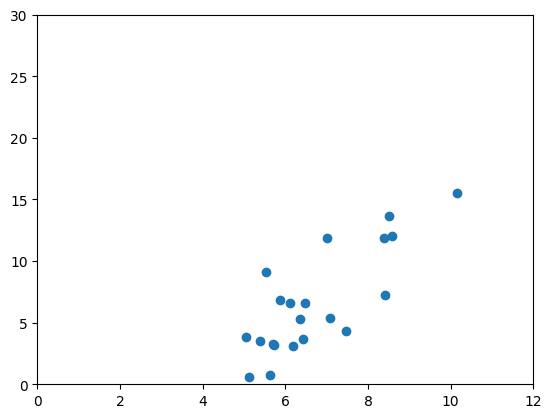

In [64]:
plt.scatter(x, y)
axes = plt.gca()
axes.set_xlim([0,12])
axes.set_ylim([0,30])

In [65]:
# ---------- Initialize your theta ---------- #

In [66]:
theta_prime = 0.5
theta = -0.5
b = - 0.5

In [67]:
# ---------- Initialize your alpha ---------- #

In [68]:
# TODO: which value is appropriate for an ideal alpha?

In [69]:
alpha = 0.001

In [70]:
# ---------- Training process ---------- #

In [81]:
theta_prime_history = []
theta_history = []
b_history = []
cost_history = []
for i in range(11):
  theta_prime_history.append(theta_prime)
  theta_history.append(theta)
  b_history.append(b)
  cost = cost_function(theta_prime, theta, b, x, y)
  cost_history.append(cost)
  # Gradient decent
  theta_prime = theta_prime - alpha *dJ_dtheta_prime(theta_prime, theta, b, x, y)
  theta = theta - alpha *dJ_dtheta(theta_prime, theta, b, x, y)
  b = b - alpha * dJ_db(theta_prime, theta, b, x, y)

In [82]:
# ---------- Theta changes during training process ---------- #

In [83]:
print(cost_history)

[1251611.2390192884, 2942948.7909111087, 6919776.287918711, 16270628.326645633, 38257347.54210377, 89955265.24420303, 211513245.32520327, 497335031.10305566, 1169392251.694211, 2749613073.9738836, 6465212736.373487]


Text(0.5, 1.0, 'Errors over iterations')

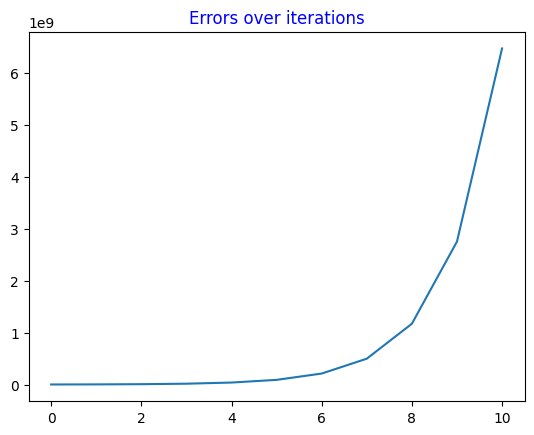

In [84]:
cost_x = list(range(len(cost_history)))
cost_y = cost_history
plt.plot(cost_x, cost_y)
plt.title("Errors over iterations", color = 'blue')

In [85]:
# ----------------- Normalize Your Data ----------------- #

In [90]:
x_max = max(x)
x_min = min(x)
x_norm = list((x[i]-x_min)/ (x_max-x_min) for i in range(len(x)))

In [91]:
y_max = max(y)
y_min = min(y)
y_norm = list((y[i]-y_min)/ (y_max-y_min) for i in range(len(y)))

In [92]:
# ---------- Showing your data ---------- #

(0.0, 1.8)

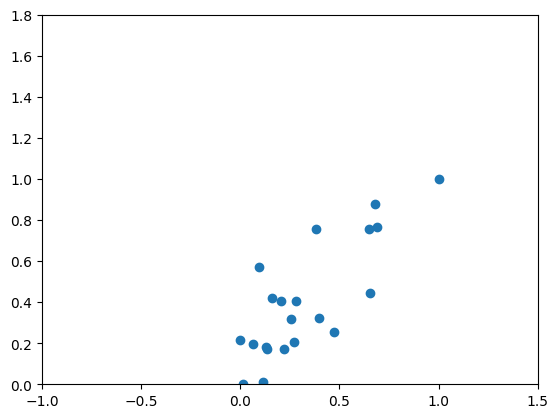

In [93]:
plt.scatter(x_norm, y_norm)
axes = plt.gca()
axes.set_xlim([-1,1.5])
axes.set_ylim([0,1.8])

In [94]:
# ---------- Initialize your theta ---------- #

In [112]:
theta_prime = 0.5
theta = -0.5
b = - 0.5

In [113]:
# ---------- Initialize your alpha ---------- #

In [114]:
alpha = 0.3

In [115]:
# ---------- Training process ---------- #
# ------- Using x_norm & y_norm -------- #

In [116]:
theta_prime_history = []
theta_history = []
b_history = []
cost_history = []
for i in range(11):
  theta_prime_history.append(theta_prime)
  theta_history.append(theta)
  b_history.append(b)
  cost = cost_function(theta_prime, theta, b, x_norm, y_norm)
  cost_history.append(cost)
  # Gradient decent
  theta_prime = theta_prime - alpha *dJ_dtheta_prime(theta_prime, theta, b, x_norm, y_norm)
  theta = theta - alpha *dJ_dtheta(theta_prime, theta, b, x_norm, y_norm)
  b = b - alpha * dJ_db(theta_prime, theta, b, x_norm, y_norm)

In [117]:
# ---------- Theta changes during training process ---------- #

In [118]:
print(cost_history)

[0.519911756444309, 0.24373696478585558, 0.12001399408865643, 0.06444220467503985, 0.03936269137417635, 0.02794473837935608, 0.022661211891982315, 0.020142414028349293, 0.018877553094875505, 0.01818772072478602, 0.01776675284840944]


Text(0.5, 1.0, 'Errors over iterations')

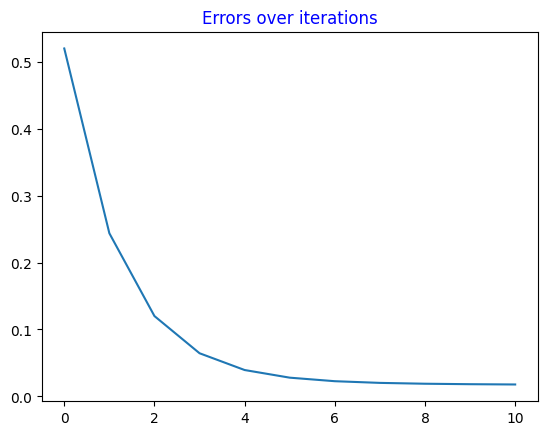

In [119]:
cost_x = list(range(len(cost_history)))
cost_y = cost_history
plt.plot(cost_x, cost_y)
plt.title("Errors over iterations", color = 'blue')

theta_prime: 0.5, theta: -0.5, b: -0.5


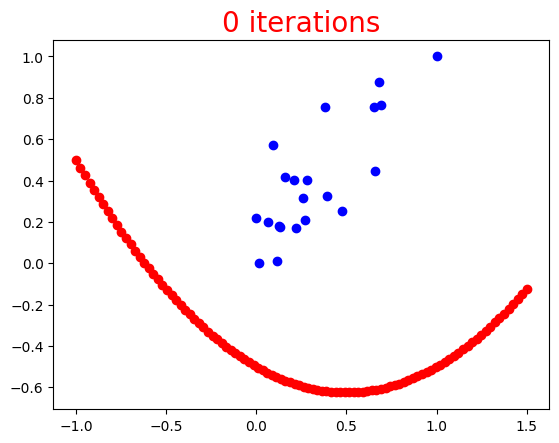

In [120]:
theta_prime = theta_prime_history[0]
theta = theta_history[0]
b = b_history[0]

print(f'theta_prime: {theta_prime}, theta: {theta}, b: {b}')

x_plot = np.linspace(-1, 1.5, 100)
y_plot = theta_prime*(x_plot**2)+theta*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x_norm, y_norm, color='blue')


# show the plot
plt.title("0 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

theta_prime: 0.5680553714019276, theta: -0.3877687724988085, b: -0.22130055600784176


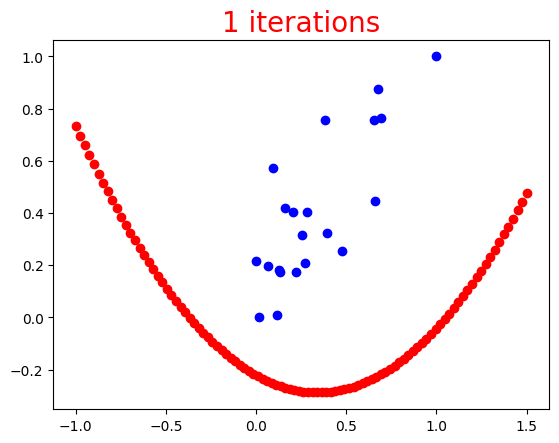

In [121]:
theta_prime = theta_prime_history[1]
theta = theta_history[1]
b = b_history[1]

print(f'theta_prime: {theta_prime}, theta: {theta}, b: {b}')

x_plot = np.linspace(-1, 1.5, 100)
y_plot = theta_prime*(x_plot**2)+theta*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x_norm, y_norm, color='blue')


# show the plot
plt.title("1 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

theta_prime: 0.6154464675575955, theta: -0.31051612439009485, b: -0.03629829660615588


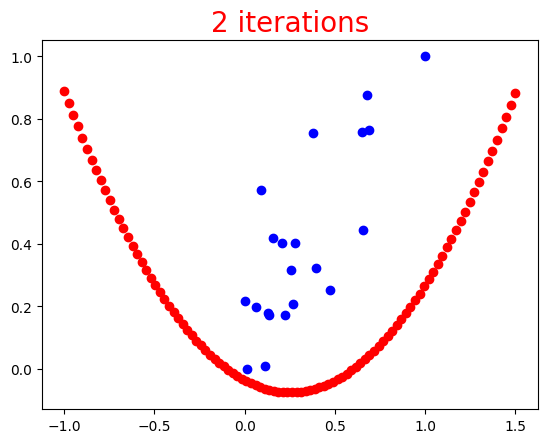

In [122]:
theta_prime = theta_prime_history[2]
theta = theta_history[2]
b = b_history[2]

print(f'theta_prime: {theta_prime}, theta: {theta}, b: {b}')

x_plot = np.linspace(-1, 1.5, 100)
y_plot = theta_prime*(x_plot**2)+theta*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x_norm, y_norm, color='blue')


# show the plot
plt.title("2 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

theta_prime: 0.6489609548369597, theta: -0.2567021172287422, b: 0.08614985680185018


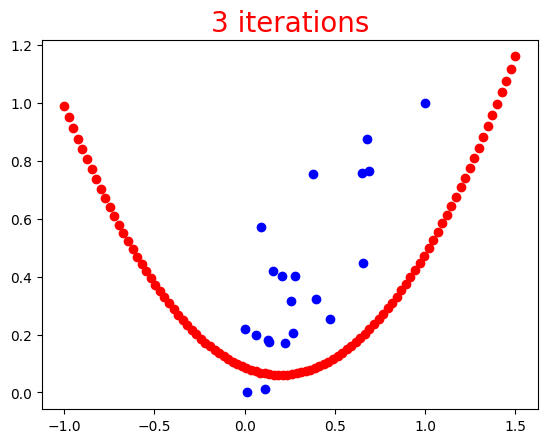

In [123]:
theta_prime = theta_prime_history[3]
theta = theta_history[3]
b = b_history[3]

print(f'theta_prime: {theta_prime}, theta: {theta}, b: {b}')

x_plot = np.linspace(-1, 1.5, 100)
y_plot = theta_prime*(x_plot**2)+theta*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x_norm, y_norm, color='blue')


# show the plot
plt.title("3 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

theta_prime: 0.6731357232938273, theta: -0.2186151817663513, b: 0.1668473845838489


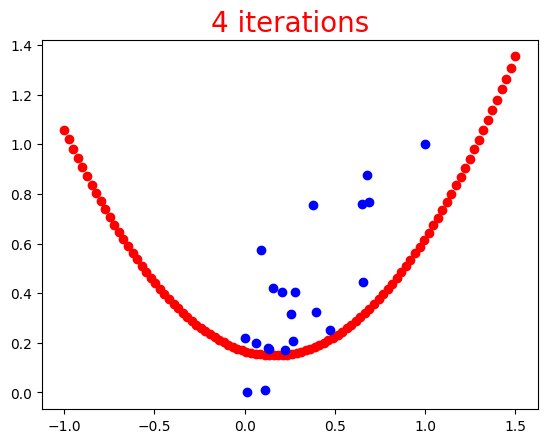

In [124]:
theta_prime = theta_prime_history[4]
theta = theta_history[4]
b = b_history[4]

print(f'theta_prime: {theta_prime}, theta: {theta}, b: {b}')

x_plot = np.linspace(-1, 1.5, 100)
y_plot = theta_prime*(x_plot**2)+theta*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x_norm, y_norm, color='blue')


# show the plot
plt.title("4 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

theta_prime: 0.6910039709363981, theta: -0.1911013348155565, b: 0.2196905485425856


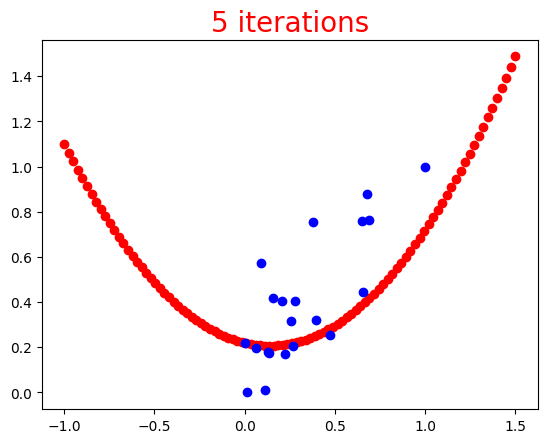

In [125]:
theta_prime = theta_prime_history[5]
theta = theta_history[5]
b = b_history[5]

print(f'theta_prime: {theta_prime}, theta: {theta}, b: {b}')

x_plot = np.linspace(-1, 1.5, 100)
y_plot = theta_prime*(x_plot**2)+theta*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x_norm, y_norm, color='blue')


# show the plot
plt.title("5 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

theta_prime: 0.7374406482520283, theta: -0.12437748898607409, b: 0.30229910920956843


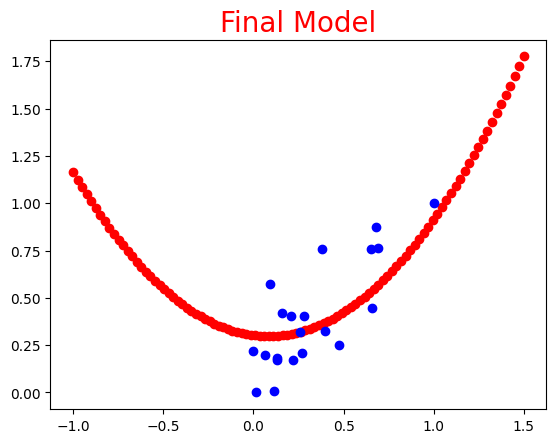

In [126]:
theta_prime = theta_prime_history[-1]
theta = theta_history[-1]
b = b_history[-1]

print(f'theta_prime: {theta_prime}, theta: {theta}, b: {b}')

x_plot = np.linspace(-1, 1.5, 100)
y_plot = theta_prime*(x_plot**2)+theta*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x_norm, y_norm, color='blue')


# show the plot
plt.title("Final Model", color='red', fontdict = {'fontsize': 20})
plt.show()

In [127]:
# Compare with model of degree 1 on original data
print('############ Lowest Cost for Model [y = 2.4451083095900437x-4.010927879850494] ############')
print(3.0920884827911035)

if b > 0:
    print(f'\n\n ############ Lowest Cost for Model [y={theta_prime_history[-1]}x**2+{theta_history[-1]}x+{b}] ############ ')
else:
    print(f'\n\n ############ Lowest Cost for Model [y={theta_prime_history[-1]}x**2+{theta_history[-1]}x{b}] ############ ')
print(cost_history[-1])

if cost_history[-1] < 3.0920884827911035:
    print('\n\nYour model won ðŸ˜†!!!!')
else:
    print('\n\nOops... You lost ðŸ˜­ Keep trying!!')

############ Lowest Cost for Model [y = 2.4451083095900437x-4.010927879850494] ############
3.0920884827911035


 ############ Lowest Cost for Model [y=0.7374406482520283x**2+-0.12437748898607409x+0.30229910920956843] ############ 
0.01776675284840944


Your model won ðŸ˜†!!!!


In [128]:
"""
Is the above result accurate ðŸ¤” There is something wrong...

"""

'\nIs the above result accurate ðŸ¤” There is something wrong...\n\n'

In [129]:
# Compare with model of degree 1 on normalized data
print('############ Lowest Cost for Model [y=0.8403015706272842x-0.6737301993086687] ############')
print(0.013844709899169255)

if b > 0:
    print(f'\n\n ############ Lowest Cost for Model [y={theta_prime_history[-1]}x**2+{theta_history[-1]}x+{b}] ############ ')
else:
    print(f'\n\n ############ Lowest Cost for Model [y={theta_prime_history[-1]}x**2+{theta_history[-1]}x{b}] ############ ')
print(cost_history[-1])

if cost_history[-1] < 0.013844709899169255:
    print('\n\nYour model won ðŸ˜†!!!!')
else:
    print('\n\nOops... You lost ðŸ˜­ Keep trying!!')

############ Lowest Cost for Model [y=0.8403015706272842x-0.6737301993086687] ############
0.013844709899169255


 ############ Lowest Cost for Model [y=0.7374406482520283x**2+-0.12437748898607409x+0.30229910920956843] ############ 
0.01776675284840944


Oops... You lost ðŸ˜­ Keep trying!!
